In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")

In [3]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
df.shape

(205843, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [6]:
df.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [8]:
df.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df[(~df['company_hash'].isnull()) & (~df['orgyear'].isnull())]
df.fillna({'job_position': 'Missing'}, inplace=True)

In [11]:
df.isnull().sum()

Unnamed: 0          0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
df[df.duplicated(keep=False)].sort_values(list(df.columns))

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
50358,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,Missing,2019.0
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,Missing,2019.0
86378,2020,77a5cecd2ed9bb764df8bf6da78a0ae2aef97fc87e913e...,2020.0,1000000,Missing,2019.0
196971,2020,77a5cecd2ed9bb764df8bf6da78a0ae2aef97fc87e913e...,2020.0,1000000,Missing,2019.0
45633,2020,b6a63b76c3a1a395f7c3d509f2760d83aeb6e8c53db2b1...,2020.0,2700000,Missing,2019.0
...,...,...,...,...,...,...
138371,xicxv,d0e72d551c69a2f9d96914515aeef797f4989b54c90ef0...,2014.0,1200000,FullStack Engineer,2019.0
72896,xznqvrxzp,c2c34a82a91169e2523727f7f15a4cc64f973ccb895b69...,2016.0,6730000,Backend Engineer,2019.0
182531,xznqvrxzp,c2c34a82a91169e2523727f7f15a4cc64f973ccb895b69...,2016.0,6730000,Backend Engineer,2019.0
24794,xzzgcvwwtq,5d00f5560a82d5ed91708273f9190499a6405abff35ab1...,2020.0,1300000,Missing,2019.0


In [14]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [15]:
df.shape

(205680, 6)

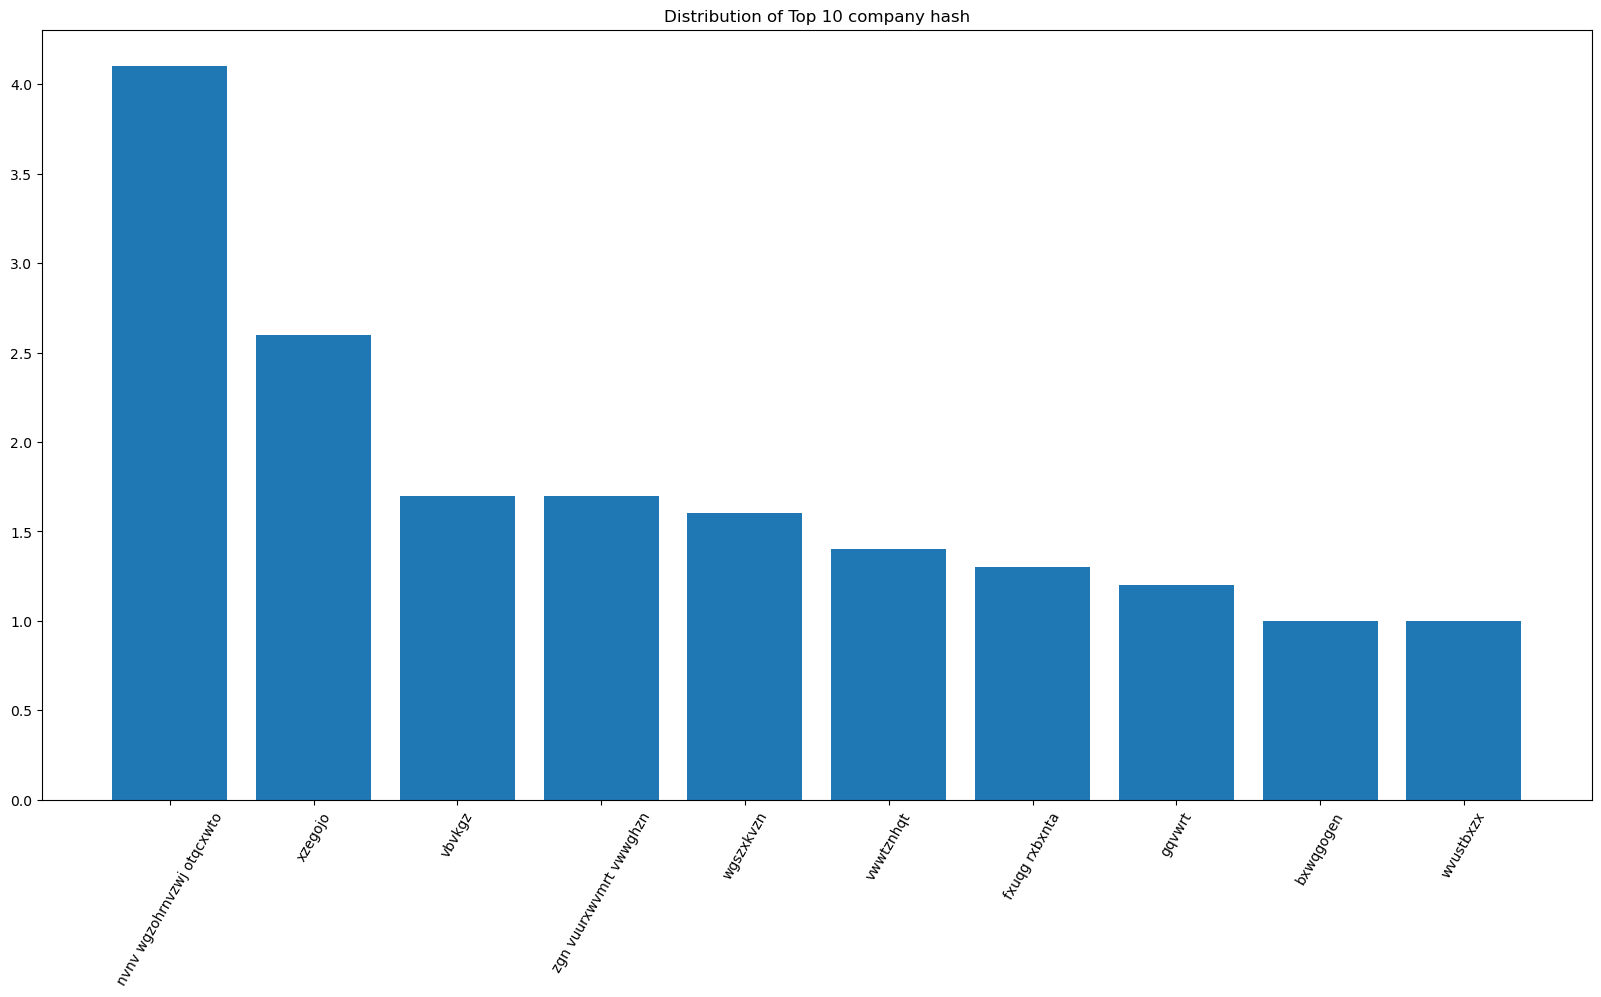

In [16]:
plt.figure(figsize=(20,10))
plt.bar(x = df['company_hash'].value_counts(normalize=True).index[:10],
       height = (df['company_hash'].value_counts(normalize=True).round(3)*100)[:10])

plt.xticks(rotation=60)
plt.title('Distribution of Top 10 company hash')
plt.show()

In [17]:
# df = df[df['orgyear'].between(1900, 2024, inclusive='both')]
df = df[(df['orgyear'] > 1900) & (df['orgyear'] <= 2024)]

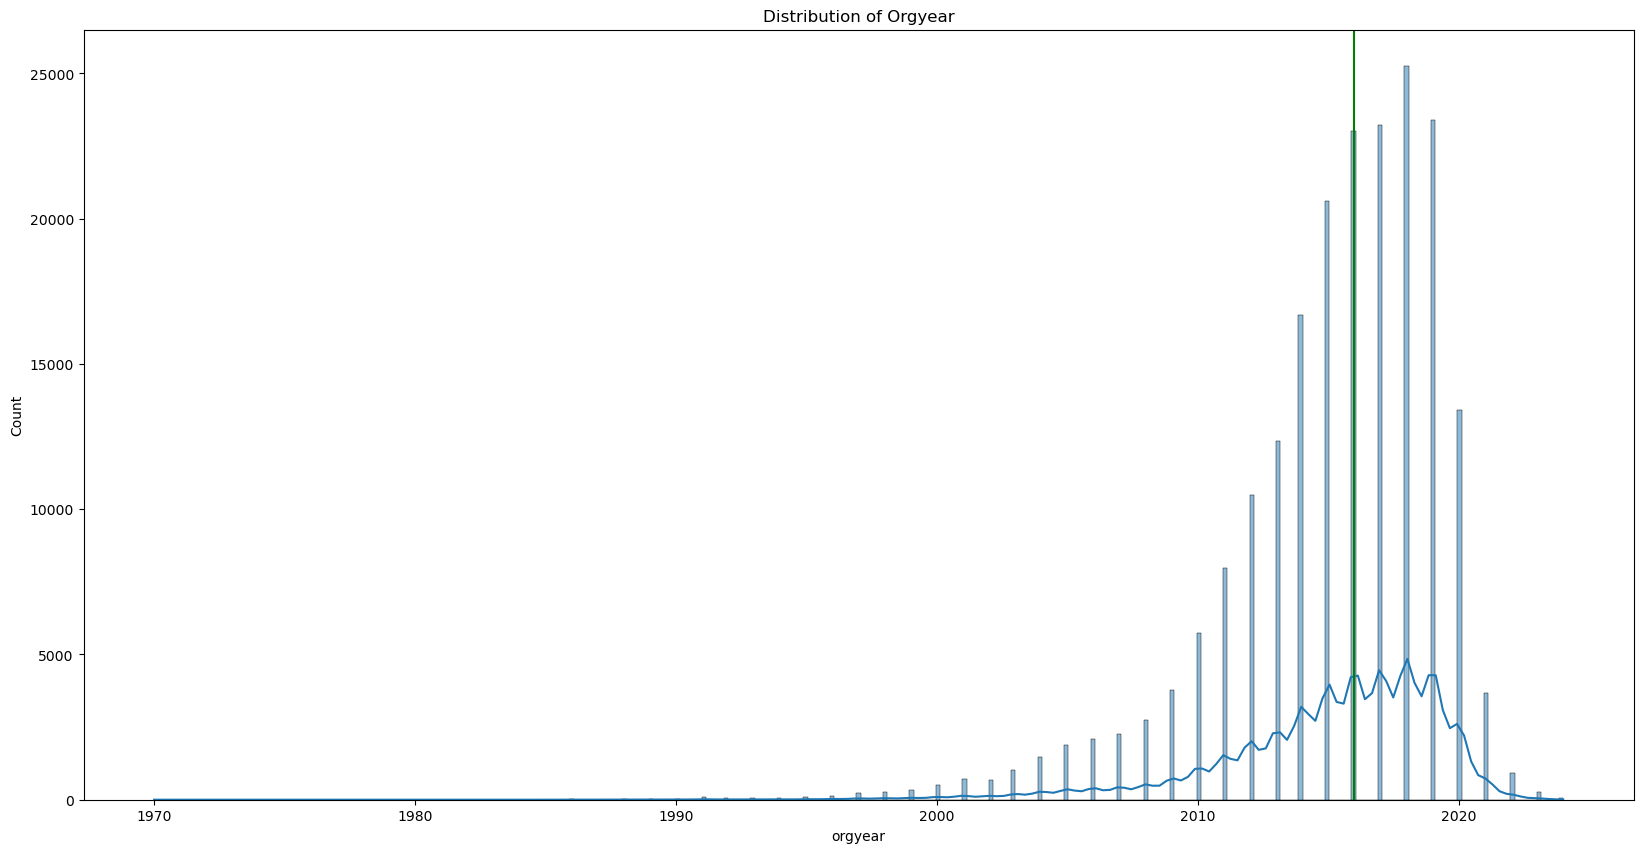

In [18]:
plt.figure(figsize=(20,10))
sns.histplot(df['orgyear'], kde=True)
plt.axvline(np.median(df['orgyear']), color='g', linestyle = '-')
plt.title('Distribution of Orgyear')
plt.show()

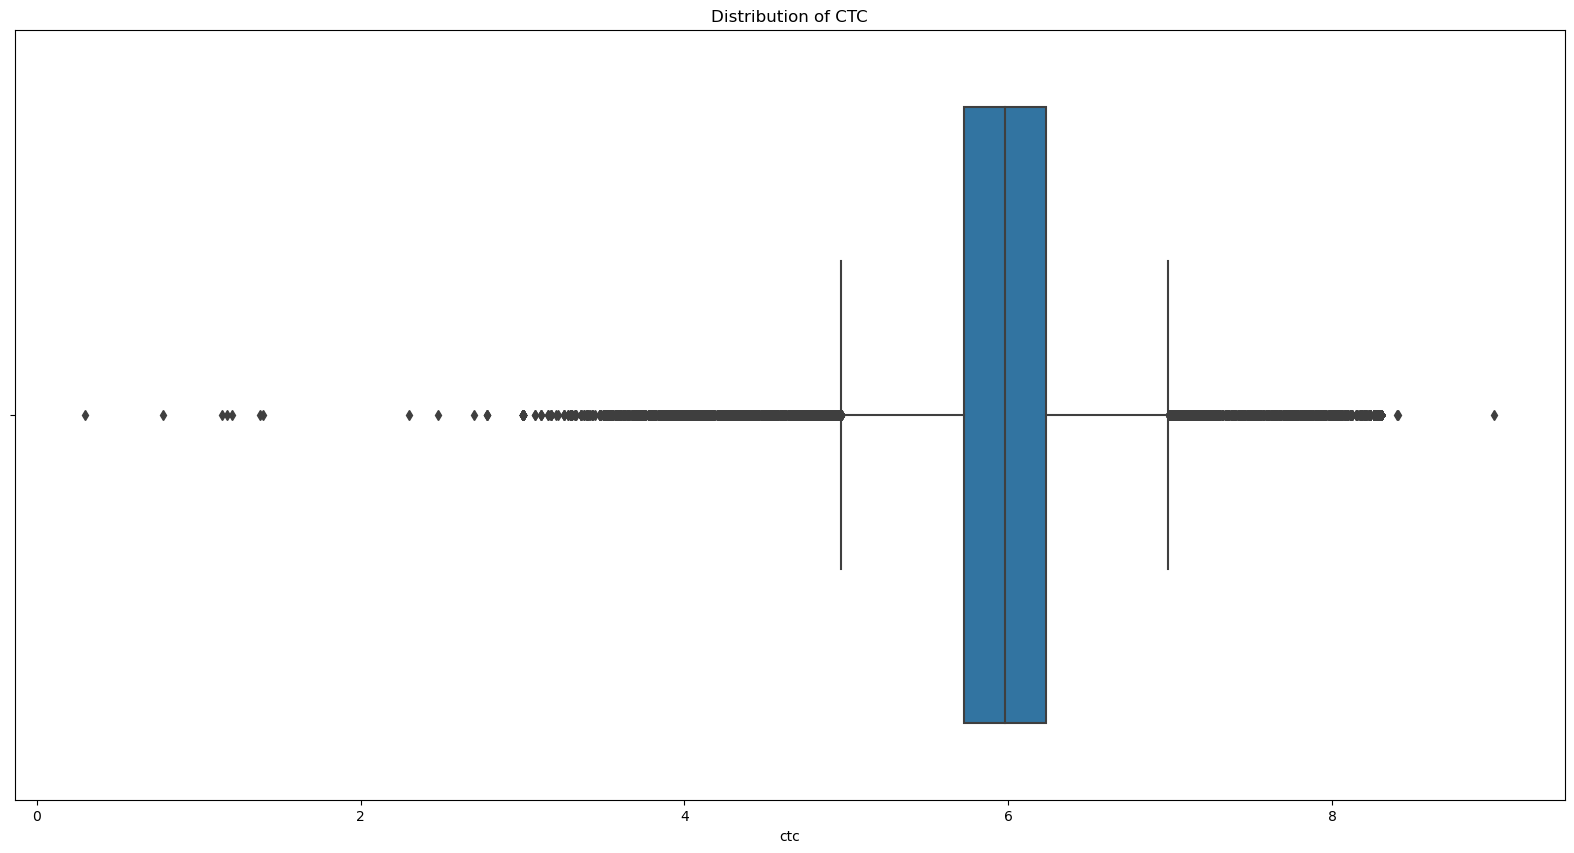

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(x = np.log10(df['ctc']))
plt.title('Distribution of CTC')
plt.show()

In [20]:
p1_ctc, p99_ctc = np.percentile(df['ctc'], [1,99])
df = df[df['ctc'].between(p1_ctc, p99_ctc)]

In [21]:
df['experience_in_years'] = df['ctc_updated_year'] - df['orgyear']

In [22]:
df['job_position'].nunique()

992

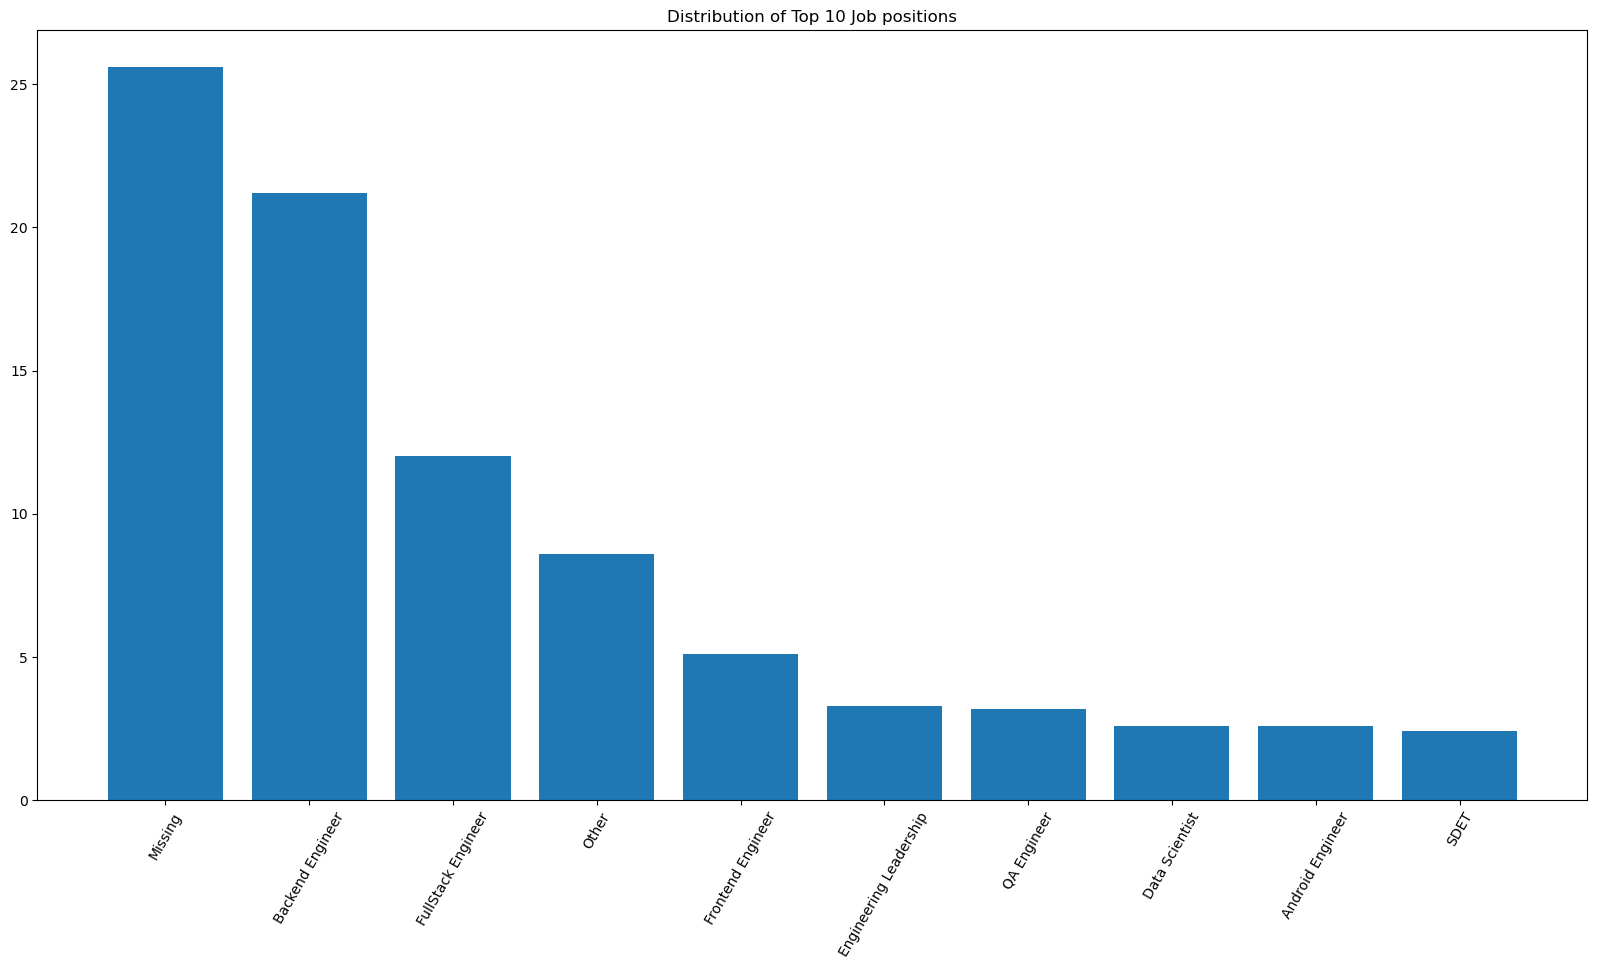

In [23]:
plt.figure(figsize=(20,10))
plt.bar(x = df['job_position'].value_counts(normalize=True).index[:10],
       height = (df['job_position'].value_counts(normalize=True).round(3) * 100)[:10])
plt.xticks(rotation=60)
plt.title('Distribution of Top 10 Job positions')
plt.show()

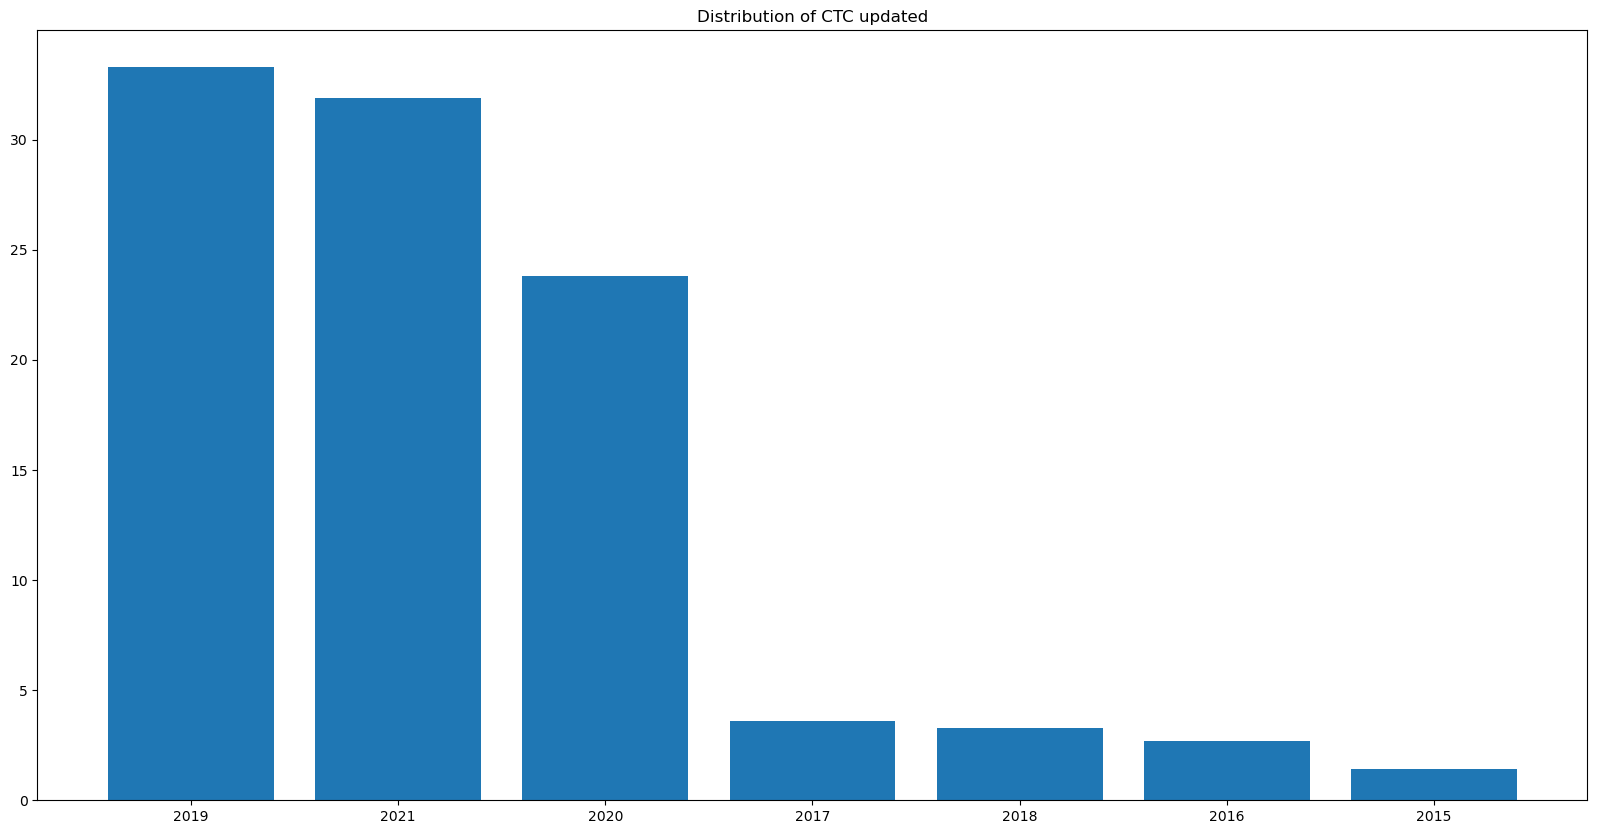

In [24]:
plt.figure(figsize=(20,10))
plt.bar(x=df['ctc_updated_year'].astype('str').str.replace('.0', '', regex = False).value_counts(normalize=True).index[:7],
       height=(df['ctc_updated_year'].astype('str').str.replace('.0', '', regex = False).value_counts(normalize=True).round(3)*100)[:7])
plt.title('Distribution of CTC updated')
plt.show()

In [25]:
df = df[df['experience_in_years'] >= 0]

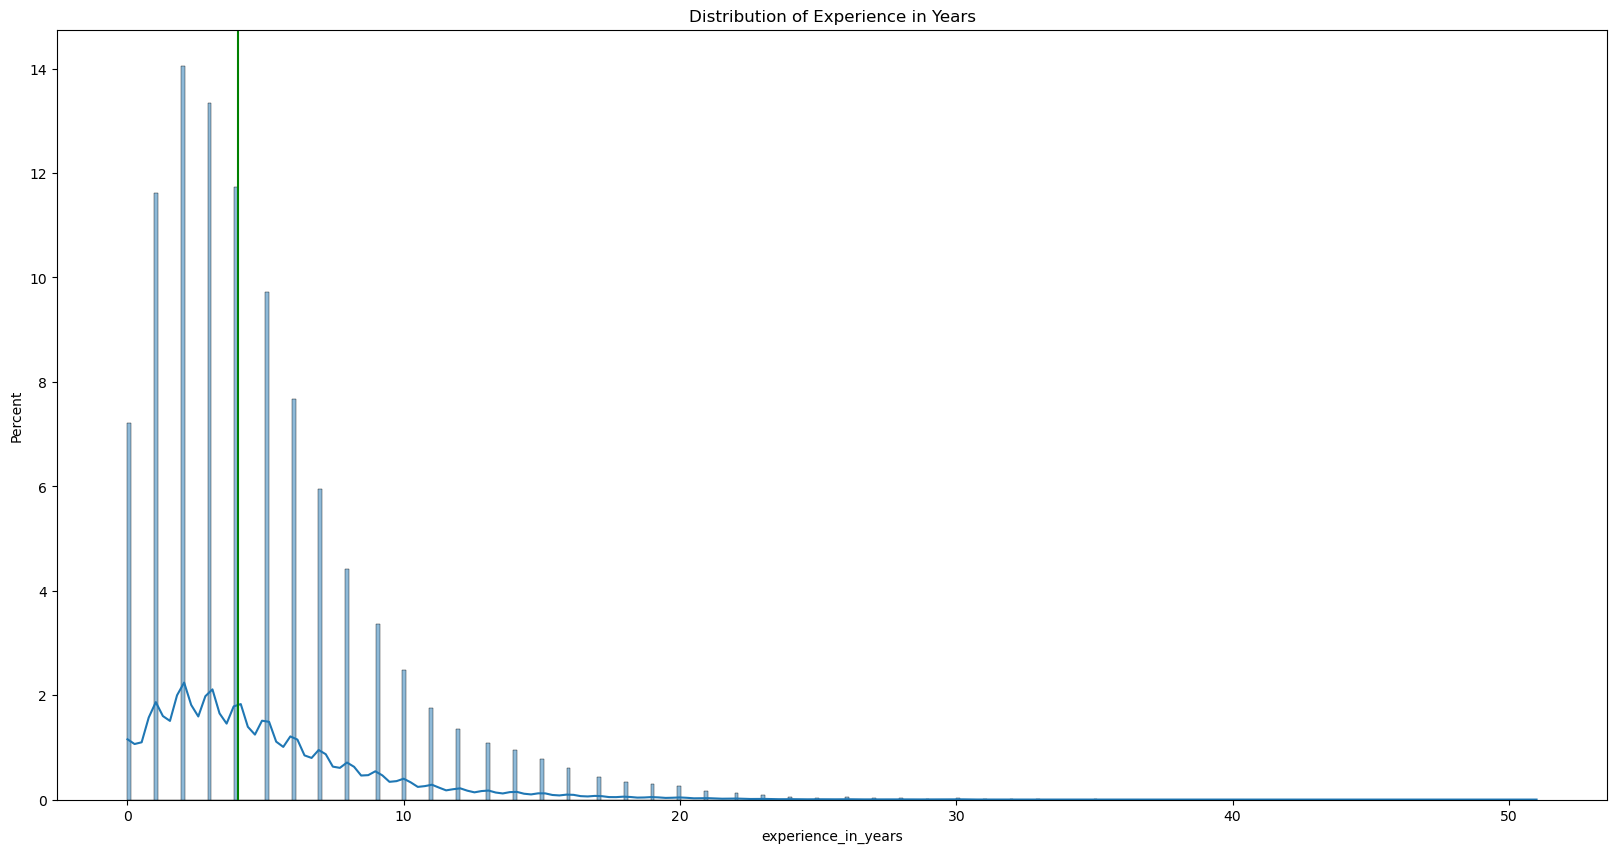

In [26]:
plt.figure(figsize=(20,10))
sns.histplot(df['experience_in_years'], stat = 'percent', kde = True)
plt.axvline(np.median(df['experience_in_years']), color = 'g', linestyle = '-')
plt.title('Distribution of Experience in Years')
plt.show()

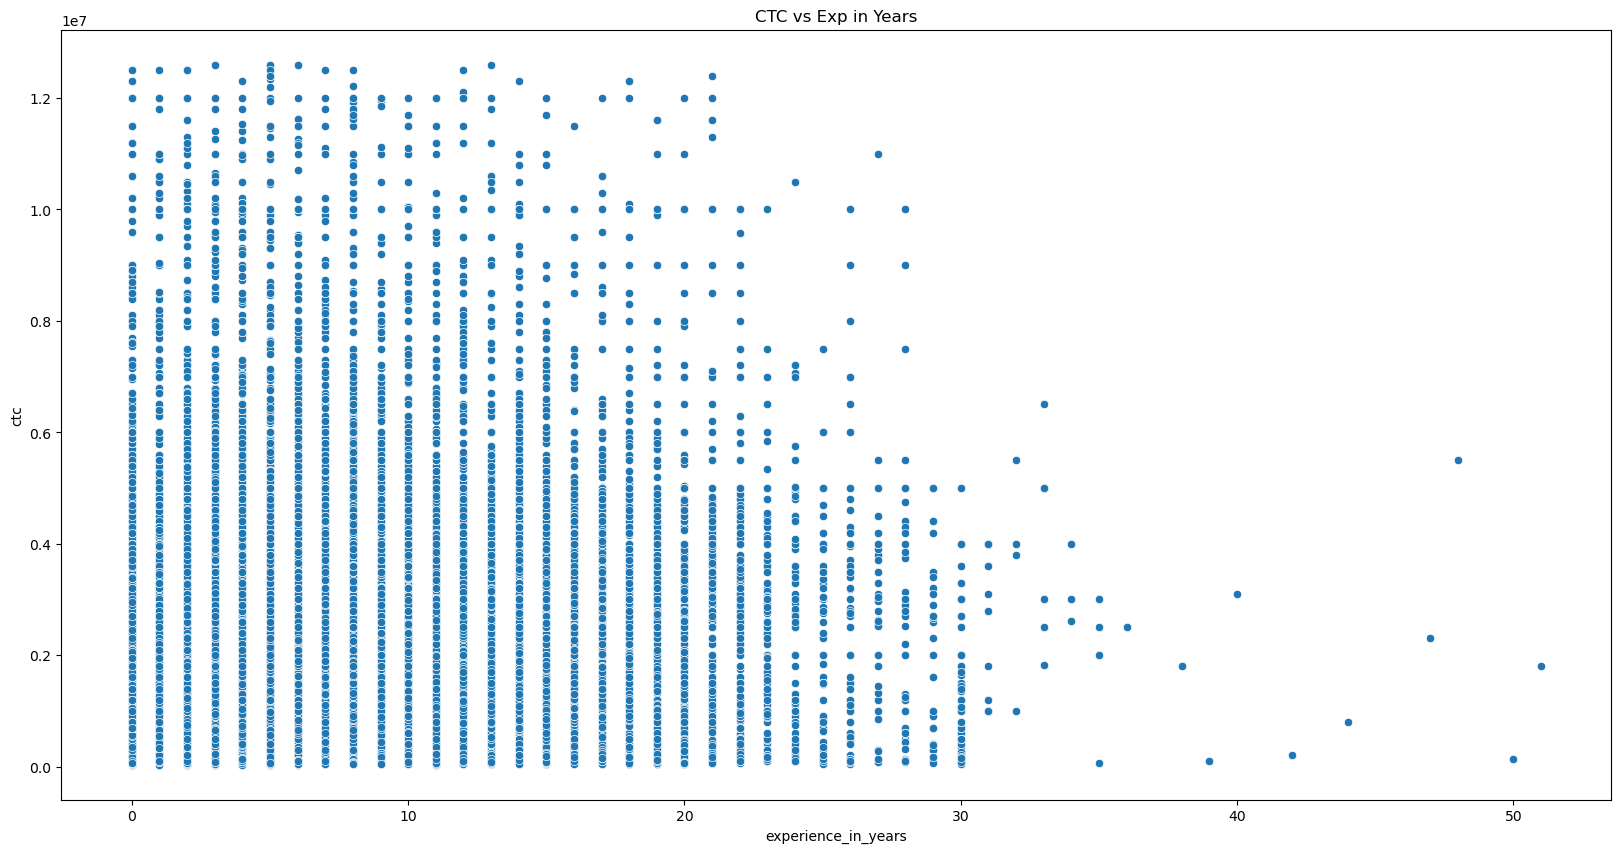

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x = 'experience_in_years', y = 'ctc')
plt.title('CTC vs Exp in Years')
plt.show()

In [28]:
exp_vs_median_ctc = (df.groupby('experience_in_years')['ctc'].median().reset_index().astype(int).rename(columns={'ctc': 'median_ctc'}))
exp_vs_median_ctc.head()

,experience_in_years,median_ctc
0,0,700000
1,1,680000
2,2,700000
3,3,800000
4,4,850000


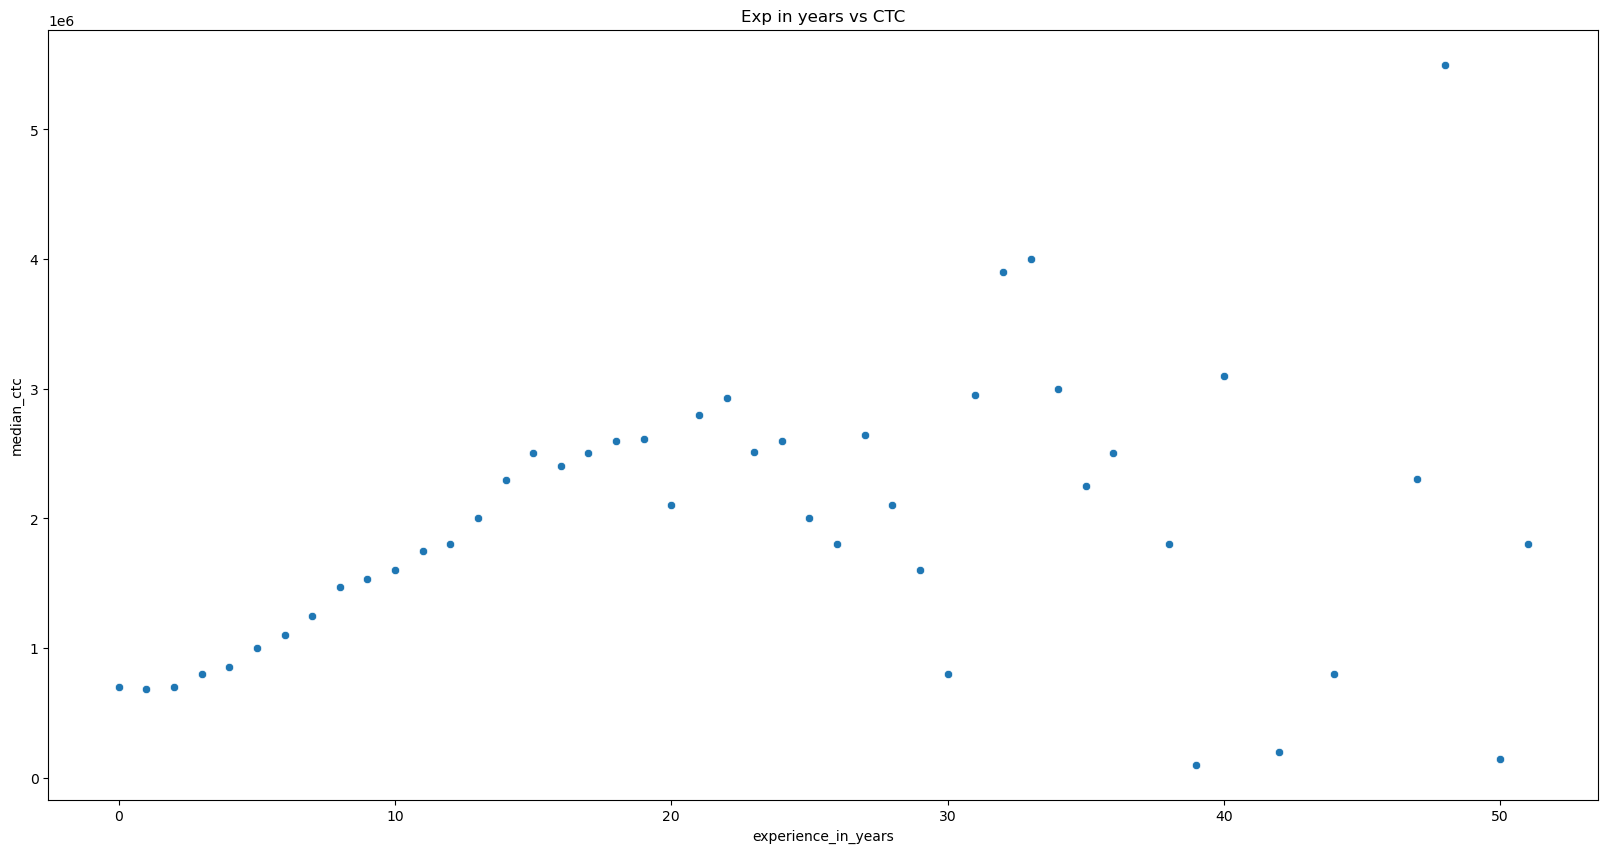

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = exp_vs_median_ctc, x = 'experience_in_years', y = 'median_ctc')
plt.title('Exp in years vs CTC')
plt.show()

In [30]:
f"{df['email_hash'].nunique()} unique emails out of {df.shape[0]} datapoints"

'143416 unique emails out of 193063 datapoints'

In [31]:
df.loc[df.duplicated(subset=['email_hash'], keep=False), 'email_hash'].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
                                                                    ..
641cfc0e8381a47252566670fa80240f3efe47b77045c2568bf06986df982bff     2
38b1f62527451e10a6885ff6d8ea2cebe1dd58d41c963f37cf47e5222375c243     2
2943614559a7e16c9f71a5673d5deaef97a0788c6c3b038c234fae9bbf7e1404     2
3531b6b6922dd818ffaf7fca6a633e953f983c7e485255ffc9e3225ff2e14676     2
8400c092bfe0b5baca38888c8cf2b9fda5e206c9812a22a05f3af039e372958b     2
Name: email_hash, Length: 39095, dtype: int64

In [32]:
dup_job_pos = df.loc[df.groupby(['company_hash', 'email_hash', 'orgyear', 'ctc', 'ctc_updated_year'])['job_position'].transform('nunique')>1]

In [33]:
dup_job_pos.sort_values(['company_hash', 'email_hash', 'orgyear', 'ctc', 'ctc_updated_year', 'job_position'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years
2936,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,Missing,2020.0,0.0
16804,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,Other,2020.0,0.0
139758,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,Backend Engineer,2021.0,2.0
97184,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,Missing,2021.0,2.0
83358,10,8b50f3193be2ee05ae3d583477ee089a7e856f6658d56b...,1993.0,450000,Backend Engineer,2021.0,28.0
...,...,...,...,...,...,...,...
151929,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000,Engineering Intern,2020.0,1.0
104603,zyco xzaxv,ed0a1202c31bdee343662f5517fc467fb8b96ccaf8e3eb...,2013.0,600000,Missing,2021.0,8.0
24228,zyco xzaxv,ed0a1202c31bdee343662f5517fc467fb8b96ccaf8e3eb...,2013.0,600000,Other,2021.0,8.0
72924,zzb ztdnstz vacxogqj ucn rna,ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...,2017.0,600000,FullStack Engineer,2021.0,4.0


In [34]:
def get_job_pos(df):
    if df.shape[0] == 1 or (df['job_position'] == 'Missing').all() or (df['job_position'] == 'Other').all():
        return df
    elif df['job_position'].isin(['Missing', 'Other']).all():
        return df[df['job_position'] == 'Other']
    else:
        return df[~df['job_position'].isin(['Missing', 'Other'])]

In [35]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,4.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,1.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,5.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,2.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,2.0


In [36]:
new_df = df.groupby(['company_hash','email_hash','orgyear','ctc','ctc_updated_year','experience_in_years'], group_keys=False).apply(get_job_pos)

In [37]:
def my_clean(col):
    import regex as re
    return re.sub('[^A-Za-z0-9 ]+', '', col)

In [38]:
new_df['company_hash'] = new_df['company_hash'].str.replace(' ', '', regex = False).apply(my_clean)
new_df['email_hash'] = new_df['email_hash'].str.replace(' ', '', regex = False).apply(my_clean)

In [39]:
new_df.reset_index(drop = True, inplace = True)

In [40]:
new_df[new_df.duplicated(keep=False)].sort_values(list(new_df.columns))

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years
9800,btqwtatomtzkqtotvqwyvzaatctrgubtznxzaxv,de8e353cd20cfd5ced34ba524fc065c0b076d047ff1273...,2013.0,1170000,Android Engineer,2019.0,6.0
9853,btqwtatomtzkqtotvqwyvzaatctrgubtznxzaxv,de8e353cd20cfd5ced34ba524fc065c0b076d047ff1273...,2013.0,1170000,Android Engineer,2019.0,6.0
93774,tatzobvqnygbtorru,0b38271bf5aad59b9335965711734f07f1a83a5dc0bcb5...,2018.0,920000,Android Engineer,2020.0,2.0
93775,tatzobvqnygbtorru,0b38271bf5aad59b9335965711734f07f1a83a5dc0bcb5...,2018.0,920000,Android Engineer,2020.0,2.0


In [41]:
new_df.drop_duplicates(subset = list(new_df.columns), inplace=True)

In [42]:
def get_designation(data):
    if data['ctc'] > data['mean_designation_ctc']:
        return 1
    elif data['ctc'] == data['mean_designation_ctc']:
        return 2
    else:
        return 3
    

In [43]:
company_pos_exp_cluster = new_df.groupby(['company_hash','job_position','experience_in_years']).agg({'ctc': ['mean', 'median', 'min', 'max', 'count']}).reset_index()

In [44]:
company_pos_exp_cluster.columns = ['company_hash','job_position','experience_in_years','mean_designation_ctc','median_ctc','min_ctc','max_ctc','emp_count']
company_pos_exp_cluster.head()

,company_hash,job_position,experience_in_years,mean_designation_ctc,median_ctc,min_ctc,max_ctc,emp_count
0,0,Other,0.0,100000.0,100000.0,100000,100000,1
1,0000,Other,3.0,300000.0,300000.0,300000,300000,1
2,01ojztqsj,Android Engineer,3.0,270000.0,270000.0,270000,270000,1
3,01ojztqsj,Frontend Engineer,8.0,830000.0,830000.0,830000,830000,1
4,05mzexzytvrnyuqxcvntrxbxnta,Backend Engineer,2.0,1100000.0,1100000.0,1100000,1100000,1


In [45]:
new_df = new_df.merge(company_pos_exp_cluster,
                     how='left',
                     left_on=['company_hash','job_position','experience_in_years'],
                     right_on=['company_hash','job_position','experience_in_years'])

In [46]:
new_df['designation'] = new_df[['ctc','mean_designation_ctc']].apply(get_designation, axis=1)
new_df.drop(columns = ['median_ctc', 'min_ctc', 'max_ctc','emp_count'], inplace = True)

In [47]:
def get_class(data):
    if data['ctc'] > data['mean_class_ctc']:
        return 1
    elif data['ctc'] == data['mean_class_ctc']:
        return 2
    else:
        return 3

In [48]:
company_pos_cluster = new_df.groupby(['company_hash','job_position']).agg({'ctc':['mean','median','min','max','count']}).reset_index()
company_pos_cluster.columns = ['company_hash','job_position','mean_class_ctc','median_ctc','min_ctc','max_ctc','emp_count']
company_pos_cluster.head()

,company_hash,job_position,mean_class_ctc,median_ctc,min_ctc,max_ctc,emp_count
0,0,Other,100000.0,100000.0,100000,100000,1
1,0000,Other,300000.0,300000.0,300000,300000,1
2,01ojztqsj,Android Engineer,270000.0,270000.0,270000,270000,1
3,01ojztqsj,Frontend Engineer,830000.0,830000.0,830000,830000,1
4,05mzexzytvrnyuqxcvntrxbxnta,Backend Engineer,1100000.0,1100000.0,1100000,1100000,1


In [49]:
new_df = new_df.merge(company_pos_cluster,
                     how='left',
                     left_on=['company_hash','job_position'],
                     right_on=['company_hash','job_position'])

In [50]:
new_df['class'] = new_df[['ctc','mean_class_ctc']].apply(get_class, axis = 1)
new_df.drop(columns=['median_ctc','min_ctc','max_ctc','emp_count'], inplace=True)

In [51]:
def get_tier(data):
    if data['ctc'] > data['mean_tier_ctc']:
        return 1
    elif data['ctc'] == data['mean_tier_ctc']:
        return 2
    else:
        return 3

In [52]:
company_cluster = new_df.groupby(['company_hash']).agg({'ctc': ['mean','median','min','max','count']}).reset_index()
company_cluster.columns = ['company_hash', 'mean_tier_ctc', 'median_ctc', 'min_ctc', 'max_ctc', 'emp_count']
company_cluster.head()

,company_hash,mean_tier_ctc,median_ctc,min_ctc,max_ctc,emp_count
0,0,100000.0,100000.0,100000,100000,1
1,0000,300000.0,300000.0,300000,300000,1
2,01ojztqsj,550000.0,550000.0,270000,830000,2
3,05mzexzytvrnyuqxcvntrxbxnta,1100000.0,1100000.0,1100000,1100000,1
4,1,100000.0,100000.0,100000,100000,1


In [53]:
new_df = new_df.merge(company_cluster,
                     how='left',
                     left_on=['company_hash'],
                     right_on=['company_hash'])

In [54]:
new_df['tier'] = new_df[['ctc', 'mean_tier_ctc']].apply(get_tier, axis = 1)
new_df.drop(columns=['median_ctc','min_ctc','max_ctc','emp_count'], inplace=True)

In [55]:
new_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
0,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,Other,2020.0,0.0,100000.0,2,100000.0,2,100000.0,2
1,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,Other,2020.0,3.0,300000.0,2,300000.0,2,300000.0,2
2,01ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,Android Engineer,2019.0,3.0,270000.0,2,270000.0,2,550000.0,3
3,01ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,Frontend Engineer,2019.0,8.0,830000.0,2,830000.0,2,550000.0,1
4,05mzexzytvrnyuqxcvntrxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,Backend Engineer,2021.0,2.0,1100000.0,2,1100000.0,2,1100000.0,2


In [56]:
tier_1 = new_df.loc[new_df['tier'] == 1]
top_tier_1 = tier_1.sort_values('ctc', ascending=False)[:10]
top_tier_1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
9126,btaxvxiaxsxnvrrna,3e8485855c2ef5d655af56abce014bd26774e99caf048e...,2005.0,12600000,Engineering Leadership,2018.0,13.0,1.260000e+07,2,1.005000e+07,1,3.627727e+06,1
19654,cxqnhov,739fba96b521309b66b7383714ff72f49e78c68b9b1b9e...,2013.0,12600000,Missing,2019.0,6.0,6.800000e+06,1,1.093778e+06,1,1.015477e+06,1
90590,sqvm,bb37a0c225c7288e77e201f2cc560f3ffa6c1aee5f47b7...,2015.0,12600000,Backend Engineer,2020.0,5.0,4.337083e+06,1,2.793737e+06,1,2.764816e+06,1
19813,cxqnhovwgzohrnxzsotqcxwto,739fba96b521309b66b7383714ff72f49e78c68b9b1b9e...,2013.0,12600000,Android Engineer,2019.0,6.0,1.260000e+07,2,6.750000e+06,1,8.968157e+05,1
90591,sqvm,bb37a0c225c7288e77e201f2cc560f3ffa6c1aee5f47b7...,2015.0,12600000,Engineering Leadership,2020.0,5.0,7.700000e+06,1,4.990889e+06,1,2.764816e+06,1
131878,wvustbxzx,80d9283a2b17a054ed46f3db11da8b609472e6b7f15031...,2016.0,12600000,FullStack Engineer,2019.0,3.0,1.099667e+06,1,7.620505e+05,1,7.602138e+05,1
162561,zvz,ab48cea6068c8b0b7fbf6d152c82cc041a3f76285bf7a9...,2019.0,12500000,Missing,2019.0,0.0,1.377728e+06,1,1.251479e+06,1,1.166109e+06,1
156802,zgnvuurxwvmrtvwwghzn,b69935e9b3fb05bfca232556188524cf7e0106eebbc2c2...,2019.0,12500000,Frontend Engineer,2021.0,2.0,1.307000e+06,1,7.130000e+05,1,9.093656e+05,1
146926,xzntrwgqugqvnxgz,d58b91dd7a17c848974092b5d8a44f23d8d1f9de67c0cd...,2018.0,12500000,Frontend Engineer,2019.0,1.0,7.600000e+06,1,3.038750e+06,1,1.853070e+06,1
103812,uvjuvr,5a2eb60ae8a4f79530481963227cfd956246b93425dfa3...,2015.0,12500000,Backend Engineer,2017.0,2.0,2.383518e+06,1,2.263371e+06,1,2.315601e+06,1


In [57]:
data_science_roles = new_df[new_df['job_position'].str.contains('data|science|scientist|analyst', regex=True, case=False)]
top_10_data_science_class_1 = data_science_roles.sort_values(by='ctc', ascending=False).head(10)
top_10_data_science_class_1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
27925,fvrbvqnrvmo,53bf8fdff1012a8cfa111fd7291e4ae5f113751184c564...,2018.0,12000000,Data Scientist,2020.0,2.0,4636000.0,1,4.337917e+06,1,2.804691e+06,1
88692,sgltp,24d6a653ce21e80d3f03eaab9b7600f4bbb0888cf7bccd...,2005.0,12000000,Data Scientist,2018.0,13.0,12000000.0,2,5.666667e+06,1,3.228967e+06,1
25988,exwg,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,2013.0,12000000,Data Scientist,2020.0,7.0,12000000.0,2,4.262500e+06,1,1.709321e+06,1
46853,mgtxzs,6b6466eb7dec3b55b8758b7850b9ca2ff562c4f7e654fa...,2019.0,12000000,Data Scientist,2020.0,1.0,12000000.0,2,5.003333e+06,1,1.412528e+06,1
67249,ohnytqrvza,3ebd4d0ab52ccfb9def2520cb5a47a74f716fe9776ffd6...,2000.0,11600000,Data Scientist,2019.0,19.0,11600000.0,2,6.155000e+06,1,2.237609e+06,1
88546,sggsrt,b17a6bbd97fdca270fba3775ccca535a7c29ce67952914...,2014.0,11000000,Data Scientist,2020.0,6.0,11000000.0,2,3.750000e+06,1,2.786261e+06,1
109293,vbvkgz,40a415ae6cd1eba19ac74f88dc2f0b7e19f398092236ee...,2014.0,10900000,Data Scientist,2019.0,5.0,4077500.0,1,2.876296e+06,1,2.347584e+06,1
110101,vbvkgz,8b790d48bafc3d1457a3863a11714e3fed88131c83134d...,2007.0,10100000,Data Scientist,2021.0,14.0,10100000.0,2,2.876296e+06,1,2.347584e+06,1
30313,fxuqgrxbxnta,c19d6c77a80b3e5163c6f6555f116351768de98aa976a7...,2016.0,10000000,Data Scientist,2020.0,4.0,3301750.0,1,1.015943e+06,1,6.899394e+05,1
64474,nytsqtvnwghqoto,764b7f8e922c062a95b362f454e53d7d9fdd23efdfe49f...,2015.0,10000000,Data Scientist,2021.0,6.0,10000000.0,2,1.000000e+07,2,1.920000e+06,1


In [58]:
data_science_roles_bottom = new_df[new_df['job_position'].str.contains('data|science|scientist|analyst', regex=True, case=False)]
top_10_data_science_class_3 = data_science_roles.sort_values(by='ctc', ascending=True).head(10)
top_10_data_science_class_3

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
12785,bwpxzotj,8df69a6bd94ff70642cd9a9b39e460fac13af0918a732e...,2020.0,39000,Data Scientist,2021.0,1.0,39000.0,2,7.563333e+05,3,1.227375e+06,3
149153,yhmd,15bd9c872ac4306fbeb2c2650c51f81ae3cfaa2bc57f69...,2018.0,40000,Data Scientist,2018.0,0.0,40000.0,2,4.000000e+04,2,4.000000e+04,2
51755,nhqxzswgb,de11a5a1dc3834bb93df291fd6b69618c2651f362853f4...,2020.0,40000,Data Scientist,2021.0,1.0,40000.0,2,4.000000e+04,2,2.770000e+06,3
55232,ntwyzxowythzxctqoxnnmtqrxz,ebb9bef059d86b03986894ec7df7238285bdea474babba...,2016.0,44000,Data Scientist,2017.0,1.0,44000.0,2,4.400000e+04,2,4.700000e+04,3
20509,dtqgd,ece6f9a4632851c64571a572cf36f67f980f8d7ac9f553...,2015.0,45000,Data Scientist,2019.0,4.0,45000.0,2,1.515000e+06,3,1.341250e+06,3
105092,uyxrvatruyxv76tqo,3e3289bdc6a0a44e537546c418517eea4ff0317a0179d9...,2014.0,46000,Data Scientist,2018.0,4.0,46000.0,2,4.600000e+04,2,4.600000e+04,2
1090,agbxzgavnvrvm,0e28367cf103d4372423e0a4b4c3d4a0ea17135e7d5fcc...,2008.0,46000,Data Scientist,2019.0,11.0,46000.0,2,4.600000e+04,2,3.118400e+06,3
139024,xqgzyvwp,6c12d5379304e002135465fcb7ad8d1e354116d4b84e81...,2019.0,46000,Data Analyst,2021.0,2.0,46000.0,2,4.600000e+04,2,4.600000e+04,2
96648,tqxwoogz,d8b6c25488ee764c6dbd20c56ad8dca794b6347d6448e2...,2017.0,49000,Data Scientist,2017.0,0.0,49000.0,2,1.587370e+06,3,1.235197e+06,3
81211,pxwoxrxwgzcvrrtj,d82099ad707c5c2d69326e07deb3ad95c1760c6cc8b5dd...,2018.0,50000,Data Analyst,2018.0,0.0,50000.0,2,5.000000e+04,2,5.000000e+04,2


In [59]:
tier_3 = new_df[(new_df['tier']==3)]
bottom_10_tier_3 = tier_3.sort_values('ctc', ascending=True)[:10]
bottom_10_tier_3

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
26967,ftontqzaxsxnvr,0e4f08076ce58deca2ffc36ff9b1fd267ad16d86230306...,2016.0,37000,Missing,2020.0,4.0,8.585000e+05,3,1.729700e+06,3,2.188339e+06,3
74835,ovowvqntwzgrgsxvtotshqvzvvhngbgnxcvov,6063bf1f68dff47765ec022e1bab3d9556e3269ad6dbc4...,2016.0,37000,Missing,2017.0,1.0,3.700000e+04,2,3.700000e+04,2,3.185000e+05,3
154627,zgnvuurxwvmrt,2987cc9b36fab6ab1a7961b2734368593ddb1392c99fda...,2017.0,37000,Missing,2017.0,0.0,1.254069e+06,3,1.032718e+06,3,1.027237e+06,3
162720,zvz,cdb728ab5e96cd9370daab79e08c6ac9d9ecf235ab5e51...,2021.0,37000,FullStack Engineer,2021.0,0.0,1.127841e+06,3,1.080753e+06,3,1.166109e+06,3
153836,zcxaxv,40693665830944b1b7565f21a885e438170124d05b9af9...,2012.0,37000,Backend Engineer,2017.0,5.0,3.700000e+04,2,2.376048e+06,3,2.050330e+06,3
85311,rggpxzsegqvlgm,825eb55baad43603ee8876ce69b068ed70c156772c329d...,2017.0,37000,Other,2019.0,2.0,6.850000e+04,3,7.531429e+05,3,7.801818e+05,3
38531,hzxntaonvntovxqegqwt,d1ac2cfd48fadc3fc08b7dcccba54305bc2bcf38ac2332...,2015.0,38000,Other,2017.0,2.0,3.800000e+04,2,3.800000e+04,2,4.150000e+04,3
155261,zgnvuurxwvmrtvwwghzn,06a151ad33d97ac9110ed187235bdc898ba639c42e234f...,2015.0,38000,Frontend Engineer,2021.0,6.0,7.431111e+05,3,7.130000e+05,3,9.093656e+05,3
12785,bwpxzotj,8df69a6bd94ff70642cd9a9b39e460fac13af0918a732e...,2020.0,39000,Data Scientist,2021.0,1.0,3.900000e+04,2,7.563333e+05,3,1.227375e+06,3
158063,zgzt,95eefe9163e7e60fbf929bb9a422f33154eb62f3a107bd...,2017.0,39000,Backend Engineer,2017.0,0.0,7.321111e+05,3,8.856538e+05,3,1.040471e+06,3


In [60]:
data_science_tier_1_with_exp = new_df[
    (new_df['job_position'].str.contains('data|science|scientist|analyst', regex=True, case=False)) &
    (new_df['tier'] == 1) &
    (new_df['experience_in_years'].isin([5, 6, 7]))]
top_10_data_science_tier_1_with_exp = data_science_tier_1_with_exp.sort_values(by='ctc', ascending=False).head(10)
top_10_data_science_tier_1_with_exp

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
25988,exwg,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,2013.0,12000000,Data Scientist,2020.0,7.0,12000000.0,2,4.262500e+06,1,1.709321e+06,1
88546,sggsrt,b17a6bbd97fdca270fba3775ccca535a7c29ce67952914...,2014.0,11000000,Data Scientist,2020.0,6.0,11000000.0,2,3.750000e+06,1,2.786261e+06,1
109293,vbvkgz,40a415ae6cd1eba19ac74f88dc2f0b7e19f398092236ee...,2014.0,10900000,Data Scientist,2019.0,5.0,4077500.0,1,2.876296e+06,1,2.347584e+06,1
86888,rvqotznghmqg,c1b14f05f5d5534b1f5ddfde5c32910455e3c98669b7be...,2015.0,10000000,Data Scientist,2020.0,5.0,10000000.0,2,3.285000e+06,1,9.326111e+05,1
64474,nytsqtvnwghqoto,764b7f8e922c062a95b362f454e53d7d9fdd23efdfe49f...,2015.0,10000000,Data Scientist,2021.0,6.0,10000000.0,2,1.000000e+07,2,1.920000e+06,1
69128,onqxut,affcfd4e17c9a8b24b91cde2aa1c2b47b1978212b0b75b...,2013.0,9000000,Data Scientist,2019.0,6.0,9000000.0,2,9.000000e+06,2,5.750000e+06,1
142319,xzegojo,469f1cc410c4a277d36b66d861e20318b73f3f8164c1d3...,2009.0,9000000,Data Analyst,2016.0,7.0,2383600.0,1,7.847894e+05,1,6.477700e+05,1
92537,stzuvwn,2ef1d3d34d78fcc08772ce6fcc8d22ba23b78c1654ef61...,2014.0,8200000,Data Analyst,2020.0,6.0,4250000.0,1,1.202667e+06,1,9.934182e+05,1
121001,vxqmzm,67aa9d931d4f20a481bb08ca1e62f572806a0072ee359a...,2014.0,8000000,Data Scientist,2021.0,7.0,8000000.0,2,8.000000e+06,2,2.012857e+06,1
28171,fvrbvqnrvmo,abd1d01ed479f408a6d6b5717cdc8847c9a67c21ae0fe8...,2014.0,7900000,Data Scientist,2019.0,5.0,4866000.0,1,4.337917e+06,1,2.804691e+06,1


In [61]:
company_wise_max_ctc = new_df.groupby('company_hash')['ctc'].max().reset_index()
company_wise_max_ctc.columns = ['company_hash', 'max_ctc']
company_wise_max_ctc.sort_values('max_ctc', ascending=False)[:10]

,company_hash,max_ctc
20232,sqvm,12600000
2502,btaxvxiaxsxnvrrna,12600000
29507,wvustbxzx,12600000
4584,cxqnhov,12600000
4589,cxqnhovwgzohrnxzsotqcxwto,12600000
3502,bxwqgogen,12500000
34348,zvz,12500000
31823,xzntrwgqugqvnxgz,12500000
23699,uvjuvr,12500000
28441,wmqt,12500000


In [62]:
def get_top_2_position(df):
    df = df.sort_values('ctc', ascending=False)
    if df.shape[0] <= 2:
        return df
    elif (~df['job_position'].isin(['Missing', 'Other'])).sum() >= 2:
        df = df[~df['job_position'].isin(['Missing', 'Other'])]
        return df.iloc[:2, :]
    else:
        return df.iloc[:2, :]

In [63]:
company_wise_position_wise_max_ctc = new_df.groupby(['company_hash', 'job_position'])['ctc'].max().reset_index()
company_wise_top_2_positions = company_wise_position_wise_max_ctc.groupby('company_hash').apply(get_top_2_position)

In [64]:
company_wise_top_2_positions.head()

company_hash       job_position  \
company_hash                                                                    
0                           0                            0              Other   
0000                        1                         0000              Other   
01ojztqsj                   3                    01ojztqsj  Frontend Engineer   
                            2                    01ojztqsj   Android Engineer   
05mzexzytvrnyuqxcvntrxbxnta 4  05mzexzytvrnyuqxcvntrxbxnta   Backend Engineer   

                                   ctc  
company_hash                            
0                           0   100000  
0000                        1   300000  
01ojztqsj                   3   830000  
                            2   270000  
05mzexzytvrnyuqxcvntrxbxnta 4  1100000

In [65]:
new_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
0,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,Other,2020.0,0.0,100000.0,2,100000.0,2,100000.0,2
1,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,Other,2020.0,3.0,300000.0,2,300000.0,2,300000.0,2
2,01ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,Android Engineer,2019.0,3.0,270000.0,2,270000.0,2,550000.0,3
3,01ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,Frontend Engineer,2019.0,8.0,830000.0,2,830000.0,2,550000.0,1
4,05mzexzytvrnyuqxcvntrxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,Backend Engineer,2021.0,2.0,1100000.0,2,1100000.0,2,1100000.0,2


In [66]:
from copy import deepcopy
new_df2 = deepcopy(new_df)

In [67]:
new_df2.drop(columns=['company_hash','email_hash','orgyear','ctc_updated_year','mean_designation_ctc','mean_class_ctc','mean_tier_ctc'], inplace=True)

In [68]:
new_df2.head()

,ctc,job_position,experience_in_years,designation,class,tier
0,100000,Other,0.0,2,2,2
1,300000,Other,3.0,2,2,2
2,270000,Android Engineer,3.0,2,2,3
3,830000,Frontend Engineer,8.0,2,2,1
4,1100000,Backend Engineer,2.0,2,2,2


In [69]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

lab_enc = LabelEncoder()
scaler = StandardScaler()
new_df2['job_position'] = lab_enc.fit_transform(new_df2['job_position'])
new_df2['job_position'] = scaler.fit_transform(new_df2[['job_position']]).flatten()

In [70]:
new_df2.head()

,ctc,job_position,experience_in_years,designation,class,tier
0,100000,0.745682,0.0,2,2,2
1,300000,0.745682,3.0,2,2,2
2,270000,-1.518093,3.0,2,2,3
3,830000,-0.158705,8.0,2,2,1
4,1100000,-0.939510,2.0,2,2,2


In [129]:
scaler_2 = StandardScaler()
new_df2[['ctc','experience_in_years']] = scaler_2.fit_transform(new_df2[['ctc','experience_in_years']])

In [72]:
new_df2.head()

,ctc,job_position,experience_in_years,designation,class,tier
0,-0.990633,0.745682,-1.180886,2,2,2
1,-0.831936,0.745682,-0.439409,2,2,2
2,-0.855741,-1.518093,-0.439409,2,2,3
3,-0.411390,-0.158705,0.796385,2,2,1
4,-0.197150,-0.939510,-0.686568,2,2,2


In [73]:
from sklearn.cluster import KMeans

kmeans_models = []
n_clusters = list(range(2, 31))
inertias = []
cluster_centres = []
labels = []
for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, init = 'random', n_init = 10, random_state = 1)
    kmeans.fit(new_df2)
    kmeans_models.append(kmeans)
    inertia = kmeans.inertia_
    cluster_centre = kmeans.cluster_centers_
    label = kmeans.labels_
    inertias.append(inertia)
    cluster_centres.append(cluster_centre)
    labels.append(label)

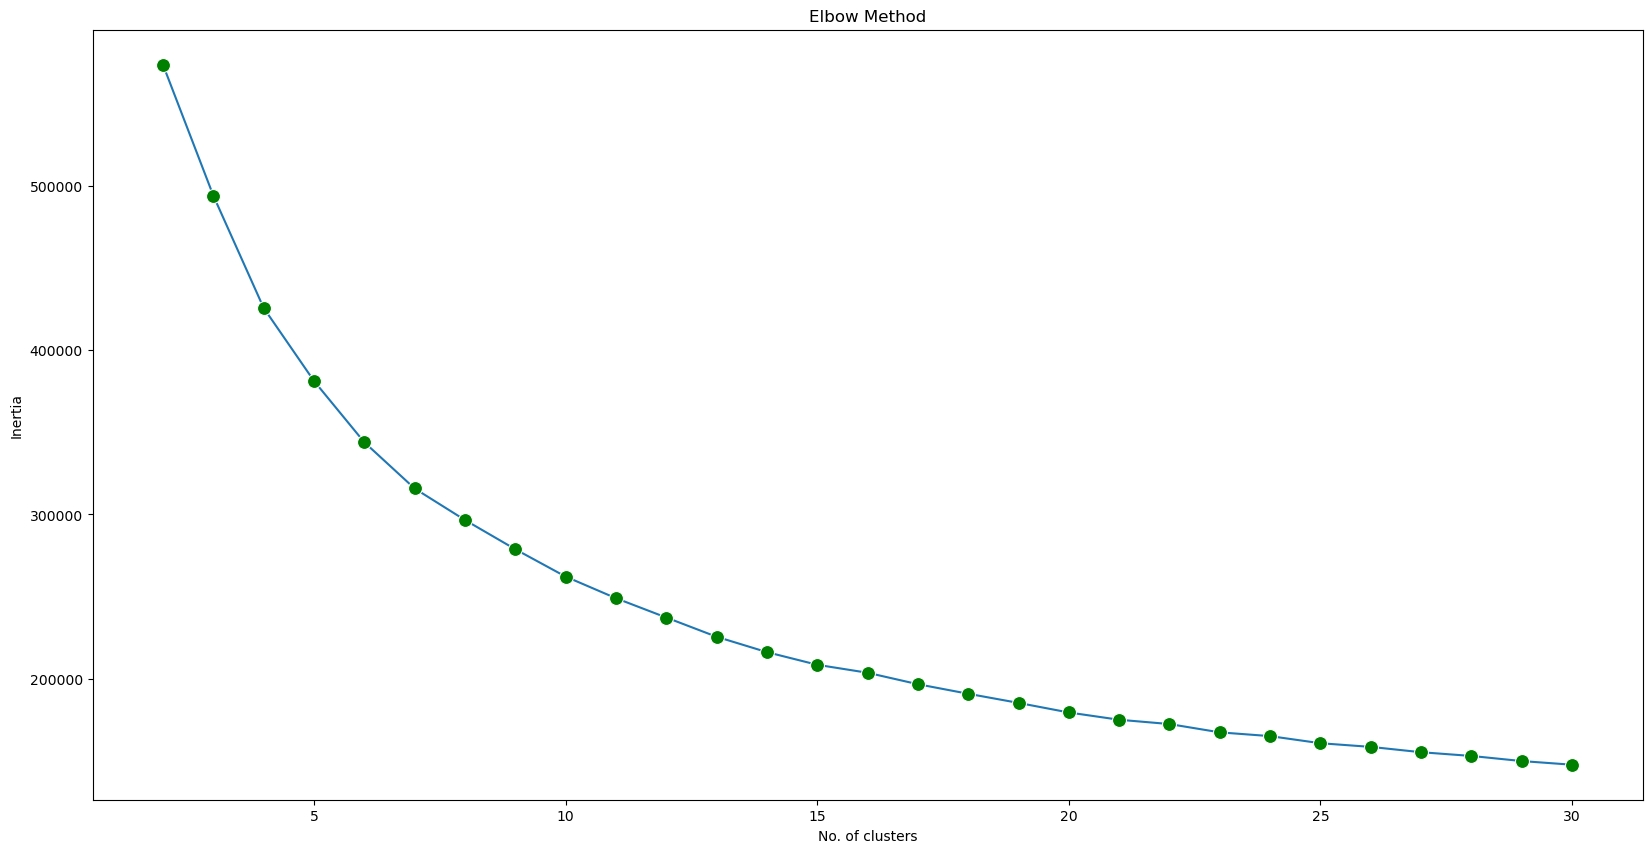

In [74]:
plt.figure(figsize=(20,10))
sns.lineplot(x = n_clusters, y = inertias, marker = 'o', markersize=10, markerfacecolor='g')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [75]:
best_kmeans = KMeans(n_clusters = 10, init = 'random', n_init = 10, random_state = 1)
best_kmeans.fit(new_df2)
best_kmeans.inertia_

262192.2888906635

In [76]:
kmeans_data = deepcopy(new_df2)
kmeans_data['label'] = best_kmeans.labels_

In [77]:
kmeans_data[['ctc','experience_in_years']] = scaler_2.inverse_transform(kmeans_data[['ctc','experience_in_years']])
kmeans_data['job_position'] = scaler.inverse_transform(kmeans_data[['job_position']]).flatten()

In [78]:
kmeans_data.head()

,ctc,job_position,experience_in_years,designation,class,tier,label
0,100000.0,434.0,0.0,2,2,2,9
1,300000.0,434.0,3.0,2,2,2,9
2,270000.0,31.0,3.0,2,2,3,8
3,830000.0,273.0,8.0,2,2,1,3
4,1100000.0,134.0,2.0,2,2,2,8


In [79]:
def mode(col):
    return col.value_counts().index[0]

In [80]:
kmeans_cluster_agg = kmeans_data.groupby('label').agg({'ctc':'median','job_position':mode,'experience_in_years':'median','designation':mode,'class':mode,'tier':mode}).reset_index()
kmeans_cluster_agg.columns = ['label','Median ctc', 'Most frequent Job position','Median work experience','Most frequent Designation','Most frequent Class','Most frequent Tier']
kmeans_cluster_agg.index += 1
kmeans_cluster_agg.drop(columns='label', inplace=True)
kmeans_cluster_agg

,Median ctc,Most frequent Job position,Median work experience,Most frequent Designation,Most frequent Class,Most frequent Tier
1,1600000.0,134.0,3.0,1,1,1
2,2450000.0,243.0,15.0,2,2,1
3,700000.0,832.0,4.0,2,2,3
4,1800000.0,134.0,8.0,2,1,1
5,500000.0,401.0,3.0,3,3,3
6,710000.0,134.0,3.0,3,3,3
7,5200000.0,134.0,7.0,1,1,1
8,850000.0,134.0,3.0,2,3,3
9,750000.0,134.0,3.0,2,2,2
10,700000.0,401.0,4.0,2,2,3


In [81]:
kmeans_cluster_agg_std = deepcopy(kmeans_cluster_agg)
kmeans_cluster_agg_std[['Median ctc', 'Median work experience']] = scaler_2.fit_transform(kmeans_cluster_agg_std[['Median ctc', 'Median work experience']])
kmeans_cluster_agg_std

,Median ctc,Most frequent Job position,Median work experience,Most frequent Designation,Most frequent Class,Most frequent Tier
1,0.054296,134.0,-0.628078,1,1,1
2,0.677968,243.0,2.648850,2,2,1
3,-0.606063,832.0,-0.355000,2,2,3
4,0.201043,134.0,0.737309,2,1,1
5,-0.752809,401.0,-0.628078,3,3,3
6,-0.598725,134.0,-0.628078,3,3,3
7,2.695731,134.0,0.464231,1,1,1
8,-0.496003,134.0,-0.628078,2,3,3
9,-0.569376,134.0,-0.628078,2,2,2
10,-0.606063,401.0,-0.355000,2,2,3


In [82]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

high_data = new_df2.sample(n=20000, replace=False, random_state=1)

In [83]:
pl = sch.linkage(high_data, method='ward')

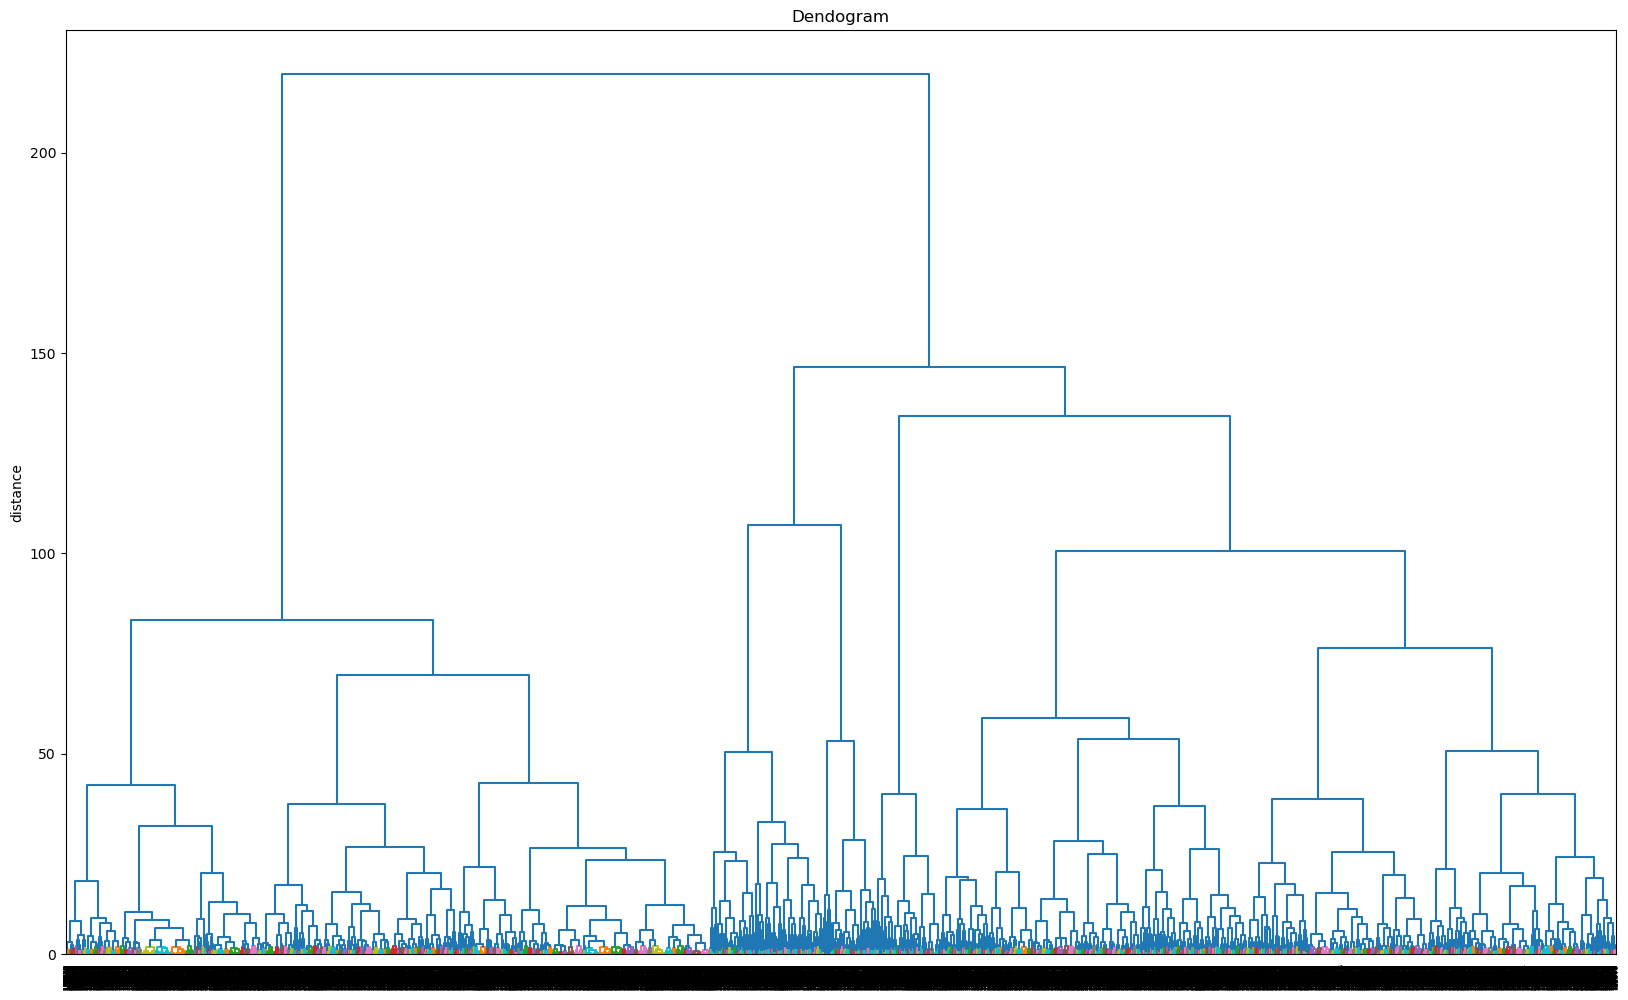

In [84]:
fig, ax = plt.subplots(figsize = (20, 12))
sch.dendrogram(pl, labels = high_data.index, ax = ax, color_threshold = 2)
plt.xticks(rotation = 90)
ax.set_ylabel('distance')
plt.title('Dendogram')
plt.show()

In [85]:
high_model = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_pred = high_model.fit_predict(high_data)

In [86]:
high_data['label'] = y_pred

In [87]:
high_data[['ctc','experience_in_years']] = scaler_2.inverse_transform(high_data[['ctc','experience_in_years']])
high_data['job_position'] = scaler.inverse_transform(high_data[['job_position']]).flatten()

In [88]:
high_data_agg = kmeans_data.groupby('label').agg({'ctc':'median','job_position':mode,'experience_in_years':'median','designation':mode,'class':mode,'tier':mode}).reset_index()
high_data_agg.columns = ['label','Median ctc', 'Most frequent Job position','Median work experience','Most frequent Designation','Most frequent Class','Most frequent Tier']
high_data_agg.index += 1
high_data_agg.drop(columns='label', inplace=True)
high_data_agg

,Median ctc,Most frequent Job position,Median work experience,Most frequent Designation,Most frequent Class,Most frequent Tier
1,1600000.0,134.0,3.0,1,1,1
2,2450000.0,243.0,15.0,2,2,1
3,700000.0,832.0,4.0,2,2,3
4,1800000.0,134.0,8.0,2,1,1
5,500000.0,401.0,3.0,3,3,3
6,710000.0,134.0,3.0,3,3,3
7,5200000.0,134.0,7.0,1,1,1
8,850000.0,134.0,3.0,2,3,3
9,750000.0,134.0,3.0,2,2,2
10,700000.0,401.0,4.0,2,2,3


In [89]:
high_data_agg_std = deepcopy(high_data_agg)
high_data_agg_std[['Median ctc', 'Median work experience']] = scaler_2.fit_transform(high_data_agg_std[['Median ctc', 'Median work experience']])
high_data_agg_std

,Median ctc,Most frequent Job position,Median work experience,Most frequent Designation,Most frequent Class,Most frequent Tier
1,0.054296,134.0,-0.628078,1,1,1
2,0.677968,243.0,2.648850,2,2,1
3,-0.606063,832.0,-0.355000,2,2,3
4,0.201043,134.0,0.737309,2,1,1
5,-0.752809,401.0,-0.628078,3,3,3
6,-0.598725,134.0,-0.628078,3,3,3
7,2.695731,134.0,0.464231,1,1,1
8,-0.496003,134.0,-0.628078,2,3,3
9,-0.569376,134.0,-0.628078,2,2,2
10,-0.606063,401.0,-0.355000,2,2,3


In [91]:
from kmodes.kprototypes import KPrototypes

kprototype_data = deepcopy(new_df2)
kprototype_data['job_position'] = new_df2['job_position']

In [130]:
scaler_3 = StandardScaler()
kprototype_data[['designation','class','tier']] = scaler_3.fit_transform(kprototype_data[['designation','class','tier']])

In [95]:
kprototype_models = []
kprototype_costs = []
kprototype_k = list(range(2, 21))
for k in kprototype_k:
    prototype = KPrototypes(n_clusters = k, max_iter = 20, n_jobs = -1)
    prototype.fit(kprototype_data, categorical = [1])
    kprototype_models.append(prototype)
    kprototype_costs.append(prototype.cost_)

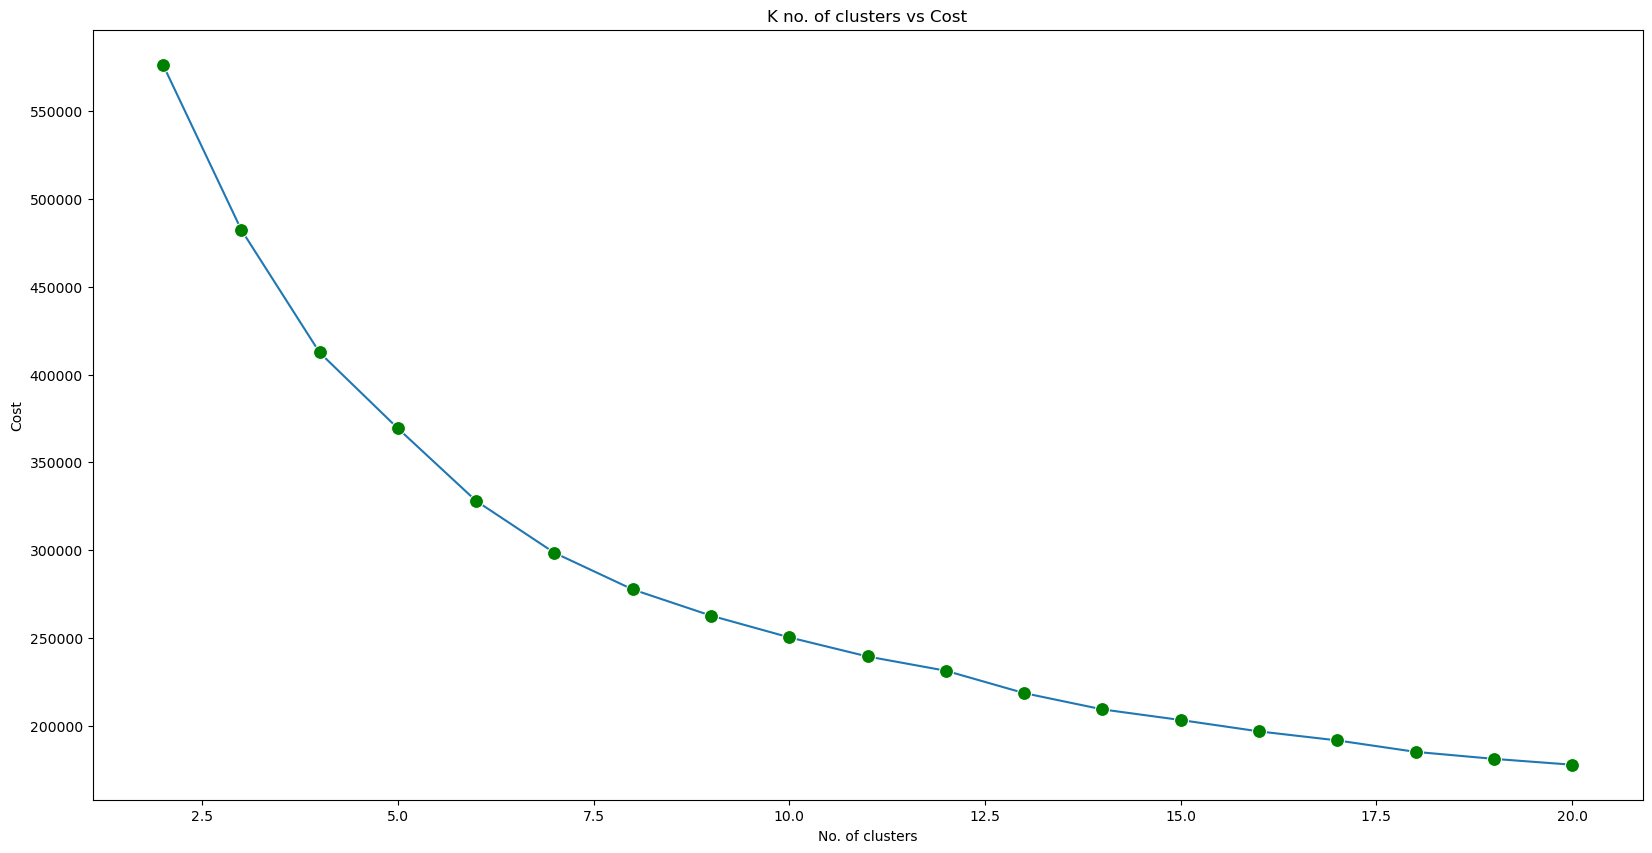

In [96]:
plt.figure(figsize=(20,10))
sns.lineplot(x = kprototype_k, y = kprototype_costs, marker = 'o', markersize=10, markerfacecolor='g')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('K no. of clusters vs Cost')
plt.show()

In [110]:
kprototypes_k_10_model = kprototype_models[8]
kprototypes_k_10_model

KPrototypes(gamma=0.5, max_iter=20, n_clusters=10, n_jobs=-1)

In [111]:
kprototype_data['label'] = kprototypes_k_10_model.labels_

In [131]:
kprototype_data[['designation','class','tier']] = scaler_3.inverse_transform(kprototype_data[['designation','class','tier']])
kprototype_data[['ctc','experience_in_years']] = scaler_2.inverse_transform(kprototype_data[['ctc','experience_in_years']])

In [132]:
kprototype_cluster_agg = kprototype_data.groupby('label').agg({'ctc':'median','job_position':mode,'experience_in_years':'median','designation':mode,'class':mode,'tier':mode}).reset_index()
kprototype_cluster_agg.columns = ['label','Median ctc', 'Most frequent Job position','Median work experience','Most frequent Designation','Most frequent Class','Most frequent Tier']
kprototype_cluster_agg.index += 1
kprototype_cluster_agg.drop(columns='label', inplace=True)
kprototype_cluster_agg

,Median ctc,Most frequent Job position,Median work experience,Most frequent Designation,Most frequent Class,Most frequent Tier
1,1.852094e+06,-0.939510,6.406162,6.987201,11.870387,17.004763
2,7.165882e+05,-0.136236,3.690899,6.987201,11.931697,17.189464
3,3.203887e+06,-0.327224,14.551949,6.987201,11.870387,17.004763
4,6.340045e+06,-0.939510,6.406162,6.982027,11.870387,17.004763
5,7.165882e+05,-0.939510,3.690899,6.992375,11.993007,17.374165
6,1.159976e+06,-0.939510,4.595987,6.982027,11.870387,17.374165
7,2.014309e+06,-0.939510,4.595987,6.982027,11.870387,17.004763
8,1.798022e+06,-0.939510,5.501074,6.987201,11.931697,17.004763
9,1.095090e+06,-0.939510,10.026512,6.987201,11.931697,17.374165
10,9.328750e+05,-0.939510,3.690899,6.987201,11.993007,17.374165
